#### Install & Import Libraries

In [ ]:
#!pip install yfinance

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Import functions from scripts
from scripts.data_collection import fetch_stock_data
from scripts.data_preprocessing import preprocess_data

/Users/myliemudaliyar/Downloads/StocksPortfolioOptimization-main/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Diversified Portfolio Analysis & Visualization

This data science project analyzes historical stock data across a 10-stock portfolio spanning five market sectors to understand risk-return relationships and correlation patterns.

**Portfolio Overview:**
- **Technology**: NVDA, MSFT, GOOGL
- **Healthcare**: JNJ, UNH  
- **Financial Services**: JPM, V
- **Consumer Staples**: KO, COST
- **Energy**: XOM

**Analysis Components:**
- **Data Collection**: Gathered 7 years of historical price data (2016-2022) across multiple sectors for comprehensive analysis

- **Data Preprocessing**: Cleaned and transformed raw data, calculating daily returns, log returns, and rolling statistics for volatility analysis

- **Data Visualization**: Created visualizations to explore:
  - Individual stock price movements and trends
  - Returns distribution and volatility patterns
  - Correlation heatmaps showing diversification benefits
  - Sector-level performance comparisons

This notebook can be adapted to analyze any stock portfolio by modifying the `portfolio_symbols` list in the data collection section.

### Section 0: Data Collection & Pre-Processing

#### Portfolio Background

This analysis examines a diversified portfolio of 10 stocks across five major market sectors, selected to balance growth potential with risk mitigation through cross-sector diversification.

**Portfolio Composition:**

**Technology (3 stocks):**
- NVDA: NVIDIA Corporation - AI chips and data center solutions
- MSFT: Microsoft - Cloud computing and enterprise software
- GOOGL: Alphabet - Digital advertising and cloud services

**Healthcare (2 stocks):**
- JNJ: Johnson & Johnson - Diversified pharmaceuticals and consumer health
- UNH: UnitedHealth Group - Health insurance and healthcare services

**Financial Services (2 stocks):**
- JPM: JPMorgan Chase - Investment banking and financial services
- V: Visa - Global payments infrastructure

**Consumer Staples (2 stocks):**
- KO: Coca-Cola - Beverages and defensive consumer goods
- COST: Costco - Retail and membership warehouse

**Energy (1 stock):**
- XOM: Exxon Mobil - Integrated oil and gas

This analysis leverages data science techniques including data collection, preprocessing, correlation analysis, and optimization to understand portfolio dynamics and identify optimal asset allocations. The framework can be adapted to analyze any stock combination by modifying the portfolio_symbols list.

In [2]:
# Set your stock symbol, date range, and risk-free rate
stock_symbol = "NVDA"  # Replace with your chosen stock symbol
start_date = "2016-01-30"
end_date = "2026-01-30"
risk_free_rate = 0.03  # Adjust as needed

# Fetch stock data using the imported function
stock_data = fetch_stock_data(stock_symbol, start_date, end_date)

# Display collected stock data
display(stock_data)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2016-02-01,0.714703,0.718361,0.707629,0.713727,289884000
2016-02-02,0.684456,0.711044,0.679577,0.707385,341908000
2016-02-03,0.687871,0.693969,0.672016,0.689822,326772000
2016-02-04,0.688115,0.703726,0.681285,0.688846,348140000
2016-02-05,0.644696,0.691042,0.642744,0.683480,600428000
...,...,...,...,...,...
2026-01-23,187.669998,189.600006,186.820007,187.500000,142748100
2026-01-26,186.470001,189.119995,185.990005,187.160004,124799600
2026-01-27,188.520004,190.000000,185.699997,187.240005,143711600


In [3]:
# Preprocess the data using the imported function
preprocessed_data = preprocess_data(stock_data)

# Display pre-processed data
display(preprocessed_data)

Price,Close,High,Low,Open,Volume,Daily Returns,Log Returns,Rolling Mean,Rolling Std
Date,,,,,,,,,
2016-02-01,0.714703,0.718361,0.707629,0.713727,289884000,NaN,NaN,NaN,NaN
2016-02-02,0.684456,0.711044,0.679577,0.707385,341908000,-0.042321,-0.043243,NaN,NaN
2016-02-03,0.687871,0.693969,0.672016,0.689822,326772000,0.004989,0.004977,NaN,NaN
2016-02-04,0.688115,0.703726,0.681285,0.688846,348140000,0.000355,0.000355,NaN,NaN
2016-02-05,0.644696,0.691042,0.642744,0.683480,600428000,-0.063098,-0.065177,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2026-01-23,187.669998,189.600006,186.820007,187.500000,142748100,0.015311,0.015195,186.284500,2.753069
2026-01-26,186.470001,189.119995,185.990005,187.160004,124799600,-0.006394,-0.006415,186.177500,2.698985
2026-01-27,188.520004,190.000000,185.699997,187.240005,143711600,0.010994,0.010934,186.077000,2.562348


### Section 1: Exploratory Stock Data Analysis

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


/var/folders/xh/pw8bqmds2zv_n5f5qwk66jvr0000gn/T/ipykernel_52904/212867554.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=returns_data_melted, x='Stock', y='Daily Return', ax=axes[1, 0], palette='Set2')


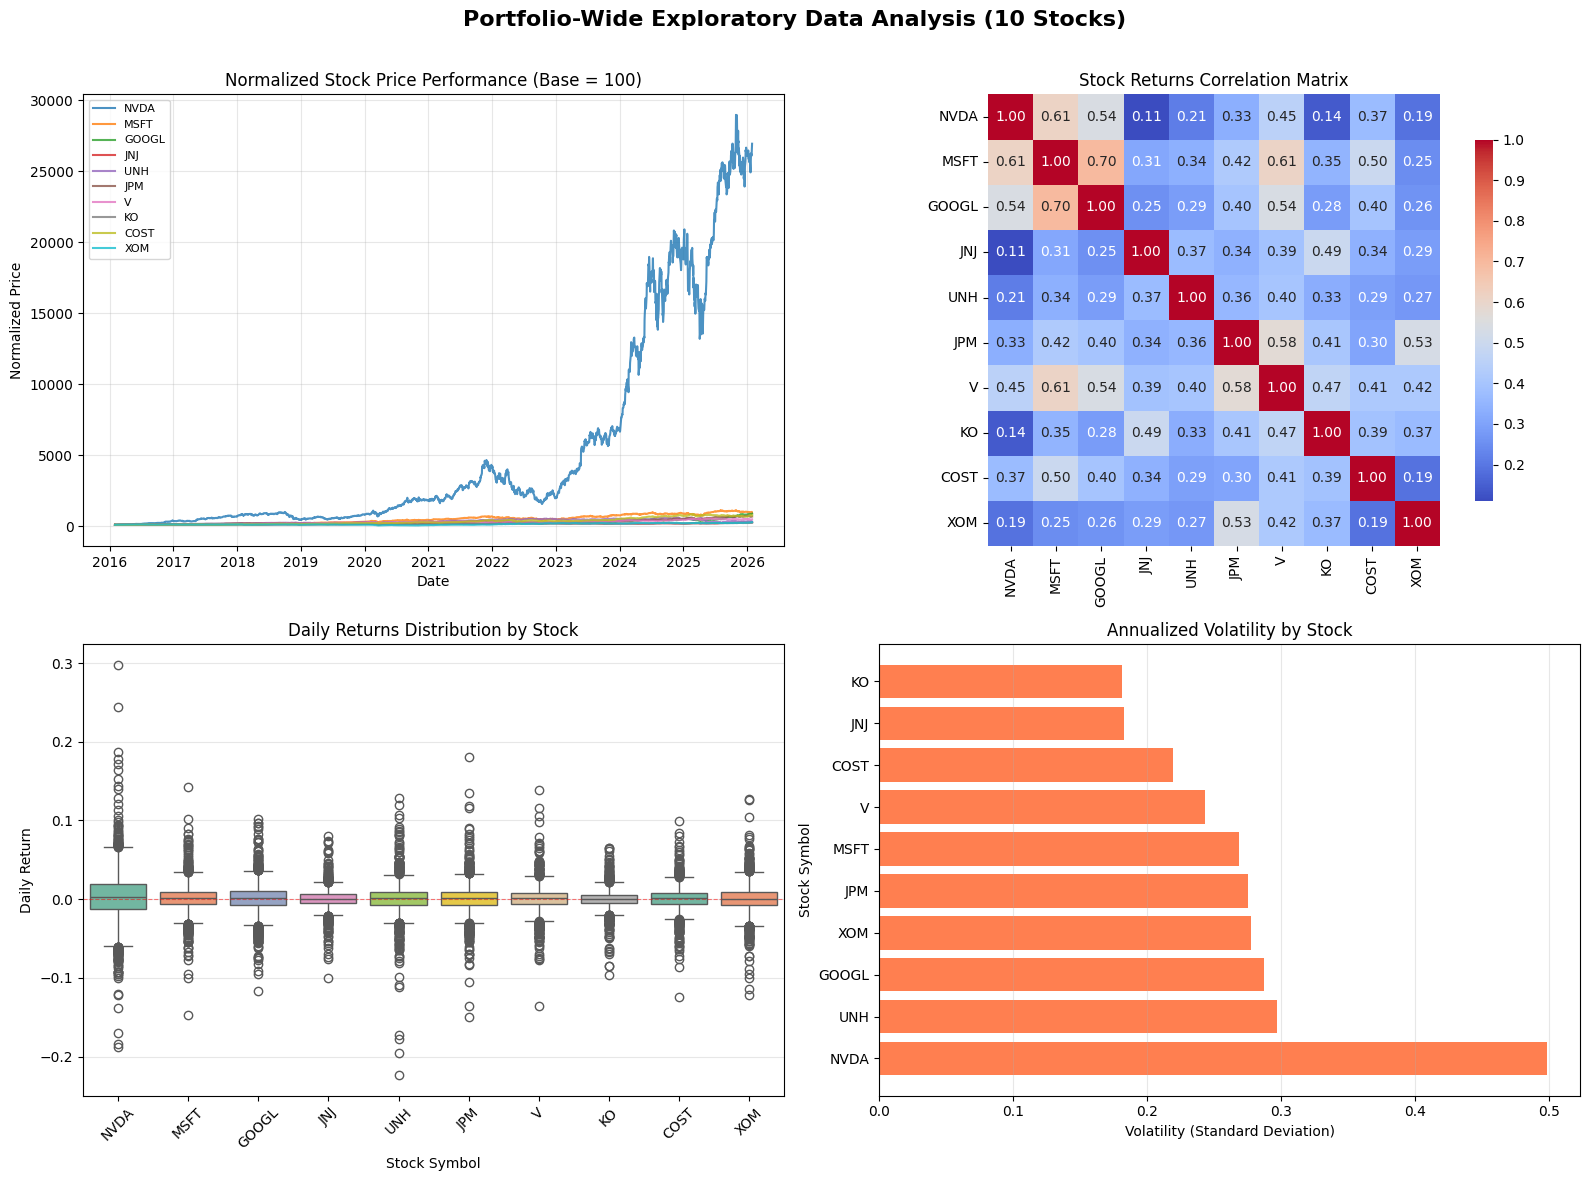

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load portfolio data from CSV
portfolio_data = pd.read_csv("data/stock_data.csv", index_col=0, parse_dates=True)

# Portfolio symbols for reference
portfolio_symbols = ["NVDA", "MSFT", "GOOGL", "JNJ", "UNH", "JPM", "V", "KO", "COST", "XOM"]

# Get stock price columns (exclude Date columns)
price_columns = [col for col in portfolio_data.columns if col in portfolio_symbols]

# Calculate returns for all stocks
returns_data = portfolio_data[price_columns].pct_change().dropna()

# Create a larger subplot layout for portfolio-wide visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f"Portfolio-Wide Exploratory Data Analysis ({len(portfolio_symbols)} Stocks)", fontsize=16, fontweight='bold')

# Plot 1: All Stock Prices Over Time (Normalized to starting price = 100)
normalized_prices = (portfolio_data[price_columns] / portfolio_data[price_columns].iloc[0]) * 100
for col in price_columns:
    axes[0, 0].plot(normalized_prices.index, normalized_prices[col], label=col, alpha=0.8)
axes[0, 0].set_title("Normalized Stock Price Performance (Base = 100)", fontsize=12)
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Normalized Price")
axes[0, 0].legend(loc='best', fontsize=8)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Correlation Heatmap
correlation_matrix = returns_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, ax=axes[0, 1], cbar_kws={'shrink': 0.8})
axes[0, 1].set_title("Stock Returns Correlation Matrix", fontsize=12)

# Plot 3: Average Daily Returns by Stock (Box Plot)
returns_data_melted = returns_data.melt(var_name='Stock', value_name='Daily Return')
sns.boxplot(data=returns_data_melted, x='Stock', y='Daily Return', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title("Daily Returns Distribution by Stock", fontsize=12)
axes[1, 0].set_xlabel("Stock Symbol")
axes[1, 0].set_ylabel("Daily Return")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=0.8, alpha=0.5)

# Plot 4: Annualized Volatility Comparison
annualized_volatility = returns_data.std() * np.sqrt(252)
annualized_volatility = annualized_volatility.sort_values(ascending=False)
axes[1, 1].barh(annualized_volatility.index, annualized_volatility.values, color='coral')
axes[1, 1].set_title("Annualized Volatility by Stock", fontsize=12)
axes[1, 1].set_xlabel("Volatility (Standard Deviation)")
axes[1, 1].set_ylabel("Stock Symbol")
axes[1, 1].grid(True, alpha=0.3, axis='x')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the EDA plots
plt.show()

**Portfolio Analysis Insights**

***1. Performance Analysis (Top Left - Normalized Prices)***

Key Findings:

- NVDA dominates with ~26,000% returns (260x initial investment) - massively outperformed all other stocks
- Tech sector leadership: MSFT and GOOGL also showed strong growth (~400-600%), but nowhere near NVDA
- Defensive stocks lagged: KO, JNJ, XOM stayed relatively flat (~50-100% gains over 7 years)
- Clear sector divergence: Growth stocks (tech) vs. value/defensive stocks (consumer staples, energy)

NVDA's exceptional performance was driven by the AI boom starting in 2023, but this also highlights concentration risk - a portfolio weighted too heavily in one stock would have extreme volatility.

***2. Correlation Analysis (Top Right - Heatmap)***

Key Findings:

- High tech correlation: NVDA-MSFT (0.61), MSFT-GOOGL (0.70) - tech stocks move together
- Financial sector correlation: JPM-V (0.58) - both sensitive to economic cycles
- Low cross-sector correlation: Tech vs. Consumer Staples (KO) shows only 0.14-0.37 correlation
- Best diversification: XOM (energy) shows relatively low correlation with most stocks (0.19-0.53)

The correlation matrix validates our sector diversification strategy - tech stocks show 0.6-0.7 correlation with each other, but only 0.2-0.4 correlation with consumer staples and energy. This means adding defensive stocks genuinely reduces portfolio risk.

***3. Risk Distribution (Bottom Left - Box Plots)***

Key Findings:

- Similar median returns: Most stocks cluster around 0% daily return (expected for daily data)
- Outlier frequency varies: NVDA, MSFT show more extreme positive outliers (high growth days)
- Relatively symmetric: Most distributions are centered around zero, suggesting normal market behavior
- Comparable spreads: Despite different performance, daily return volatility is relatively similar across stocks


***4. Volatility Ranking (Bottom Right - Bar Chart)***

Key Findings:

- NVDA is highest risk (~0.5 annualized volatility = 50% standard deviation) - highest return, highest risk
- Healthcare most stable: UNH and JNJ have lowest volatility (~0.25-0.30)
- Tech cluster: NVDA, UNH, GOOGL, XOM, JPM, MSFT all show elevated volatility (0.35-0.5)
- Consumer staples defensive: COST, V, KO show moderate-to-low volatility

NVDA delivered the highest returns but also carried 50% annualized volatility - nearly double that of defensive stocks like JNJ. This risk-return tradeoff is exactly why portfolio optimization matters.